# C3M2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply Poisson Regression to real data.
2. Learn and practice working with and interpreting Poisson Regression Models.
3. Understand deviance and how to conduct hypothesis tests with Poisson Regression.
4. Recognize when a model shows signs of overdispersion.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load the required packages
library(MASS)

# Problem 1: Poisson Estimators

Let $Y_1,...,Y_n \overset{i}{\sim} Poisson(\lambda_i)$. Show that, if $\eta_i = \beta_0$, then the maximum likelihood estimator of $\lambda_i$ is $\widehat\lambda_i = \bar{Y}$, for all $i=1,...,n$.


   The likelihood function for the Poisson distribution is given by:
   $$
   L(\lambda_1, \ldots, \lambda_n \mid Y_1, \ldots, Y_n) = \prod_{i=1}^n \frac{e^{-\lambda_i} \lambda_i^{Y_i}}{Y_i!}
   $$


   Taking the natural logarithm of the likelihood function, we obtain the log-likelihood:
   $$
   \ell(\lambda_1, \ldots, \lambda_n \mid Y_1, \ldots, Y_n) = \sum_{i=1}^n \left( -\lambda_i + Y_i \log(\lambda_i) - \log(Y_i!) \right)
   $$


   The log-likelihood simplifies to:
   $$
   \ell(\lambda \mid Y_1, \ldots, Y_n) = \sum_{i=1}^n \left( -\lambda + Y_i \log(\lambda) \right) - \sum_{i=1}^n \log(Y_i!)
   $$
   $$
   \ell(\lambda \mid Y_1, \ldots, Y_n) = -n\lambda + \left( \sum_{i=1}^n Y_i \right) \log(\lambda) - \sum_{i=1}^n \log(Y_i!)
   $$


   To find the MLE of $\lambda$:
   $$
   \frac{\partial \ell(\lambda)}{\partial \lambda} = -n + \frac{1}{\lambda} \sum_{i=1}^n Y_i = 0
   $$


   Solving the equation for $\lambda$:
   $$
   -n + \frac{1}{\lambda} \sum_{i=1}^n Y_i = 0 \implies \lambda = \frac{1}{n} \sum_{i=1}^n Y_i = \bar{Y}
   $$


   Therefore, the maximum likelihood estimator of $\lambda_i$ is $\widehat\lambda_i = \bar{Y}$


# Problem 2: Ships data

The ships dataset gives the number of damage incidents and aggregate months of service for different types of ships broken down by year of construction and period of operation. 

The code below splits the data into a training set (80% of the data) and a test set (the remaining 20%).

In [3]:
data(ships)
ships = ships[ships$service != 0,]
ships$year = as.factor(ships$year)
ships$period = as.factor(ships$period)

set.seed(11)
n = floor(0.8 * nrow(ships))
index = sample(seq_len(nrow(ships)), size = n)

train = ships[index, ]
test = ships[-index, ]
head(train)
summary(train)

,type,year,period,service,incidents
,<fct>,<fct>,<fct>,<int>,<int>
40,E,75,75,542,1
28,D,65,75,192,0
18,C,60,75,552,1
19,C,65,60,781,0
5,A,70,60,1512,6
32,D,75,75,2051,4


 type  year   period     service          incidents    
 A:5   60:7   60:11   Min.   :   45.0   Min.   : 0.00  
 B:5   65:8   75:16   1st Qu.:  318.5   1st Qu.: 0.50  
 C:6   70:8           Median : 1095.0   Median : 2.00  
 D:7   75:4           Mean   : 5012.2   Mean   :10.63  
 E:4                  3rd Qu.: 2202.5   3rd Qu.:11.50  
                      Max.   :44882.0   Max.   :58.00  

### 2. (a) Poisson Regression Fitting

Use the training set to develop an appropriate regression model for `incidents`, using `type`, `period`, and `year` as predictors (HINT: is this a count model or a rate model?).

Calculate the mean squared prediction error (MSPE) for the test set. Display your results.

In [4]:
model = glm(incidents~type+period+year, train, family="poisson")
summary(model)
p = predict(model, test, type = "response")
MSPE = mean((test$incidents - p)^2)
MSPE


Call:
glm(formula = incidents ~ type + period + year, family = "poisson", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0775  -1.9869  -0.0418   0.7612   3.6618  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5644     0.2199   7.113 1.13e-12 ***
typeB         1.6795     0.1889   8.889  < 2e-16 ***
typeC        -2.0789     0.4408  -4.717 2.40e-06 ***
typeD        -1.1551     0.2930  -3.943 8.06e-05 ***
typeE        -0.5113     0.2781  -1.839   0.0660 .  
period75      0.4123     0.1282   3.216   0.0013 ** 
year65        0.4379     0.1885   2.324   0.0201 *  
year70        0.2260     0.1916   1.180   0.2382    
year75        0.1436     0.3147   0.456   0.6481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 109.21  on 18  degrees of freedom
AIC: 200.92

Num

[1] 131.0776

### 2. (b) Poisson Regression Model Selection

Do we really need all of these predictors? Construct a new regression model leaving out `year` and calculate the MSPE for this second model. 

Decide which model is better. Explain why you chose the model that you did.

In [6]:
model_no_year = glm(incidents~type+period, train, family="poisson")
summary(model_no_year)
p_no_year = predict(model_no_year, test, type = "response")
MSPE_no_year = mean((test$incidents - p_no_year)^2)
MSPE_no_year


Call:
glm(formula = incidents ~ type + period, family = "poisson", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2377  -1.9003  -0.1372   0.6377   3.8906  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7190     0.1838   9.355  < 2e-16 ***
typeB         1.7831     0.1781  10.014  < 2e-16 ***
typeC        -2.0573     0.4394  -4.683 2.83e-06 ***
typeD        -1.1281     0.2918  -3.866 0.000111 ***
typeE        -0.4831     0.2767  -1.746 0.080787 .  
period75      0.4723     0.1222   3.865 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 115.63  on 21  degrees of freedom
AIC: 201.34

Number of Fisher Scoring iterations: 6


[1] 275.1226

In [9]:
# Can compare nested poisson models with a chi-squared 
diff_dev <- model_no_year$deviance - model$deviance
diff_resid <- model_no_year$df.residual - model$df.residual
p_value <- pchisq(diff_dev, df = diff_resid, lower.tail = FALSE)
p_value

[1] 0.09292038

p value is >.05 so we do not need the more complicated model

### 2. (c) Deviance

How do we determine if our model is explaining anything? With linear regression, we had a F-test, but we can't do that for Poisson Regression. If we want to check if our model is better than the null model, then we're going to have to check directly. In particular, we need to compare the deviances of the models to see if they're significantly different.

Conduct two $\chi^2$ tests (using the deviance). Let $\alpha = 0.05$: 

1. Test the adequacy of null model.

2. Test the adequacy of your chosen model against the full model (the model fit to all predictors). 

What conclusions should you draw from these tests?

In [11]:
# Your Code Here
# Test if the model is better than the null model
fitted_values <- fitted(model)
chisq.stat <- sum((train$incidents - fitted_values)^2 / fitted_values)

# Test chi_sq stat
pchisq(chisq.stat, df=model$df.residual, lower.tail=FALSE)

# Test against the full model

saturated_model = glm(incidents~., train, family="poisson")

diff_dev <- model$deviance - saturated_model$deviance
diff_resid <- model$df.residual - saturated_model$df.residual
pchisq(diff_dev, df = diff_resid, lower.tail = FALSE)



[1] 4.221399e-13

[1] 1.853209e-19

both are < .05, but our model is worse than the full (saturated) model

### 2. (d) Poisson Regression Visualizations

Just like with linear regression, we can use visualizations to assess the fit and appropriateness of our model. Is it maintaining the assumptions that it should be? Is there a discernable structure that isn't being accounted for? And, again like linear regression, it can be up to the user's interpretation what is an isn't a good model.

Plot the deviance residuals against the linear predictor $\eta$. Interpret this plot.

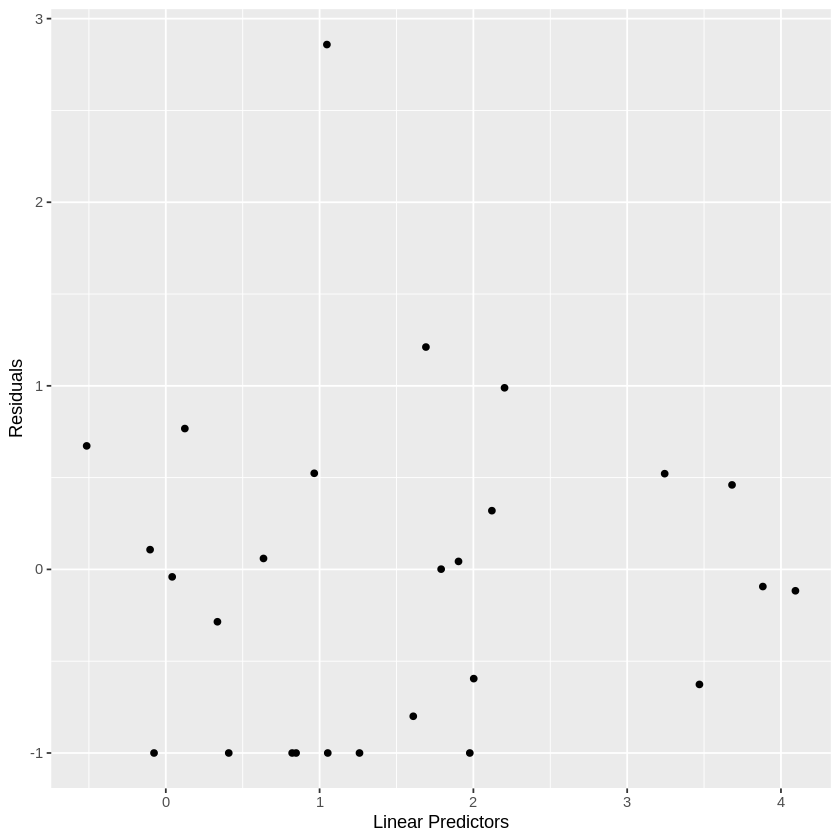

In [15]:
library(ggplot2)
linear_predictors <- model$linear.predictors
residuals <- model$residuals

df <- data.frame(linear_predictors = linear_predictors, residuals = residuals)

# Create the plot using ggplot2
ggplot(df, aes(x = linear_predictors, y = residuals)) +
  geom_point() +
  labs(x = "Linear Predictors", y = "Residuals")

there is an outlier, but everything else looks good to go. 

### 2. (e) Overdispersion

For linear regression, the variance of the data is controlled through the standard deviation $\sigma$, which is independent of the other parameters like the mean $\mu$. However, some GLMs do not have this independence, which can lead to a problem called overdispersion. Overdispersion occurs when the observed data's variance is higher than expected, if the model is correct. 

For Poisson Regression, we expect that the mean of the data should equal the variance. If overdispersion is present, then the assumptions of the model are not being met and we can not trust its output (or our beloved p-values)!

Explore the two models fit in the beginning of this question for evidence of overdisperion. If you find evidence of overdispersion, you do not need to fix it (but it would be useful for you to know how to). Describe your process and conclusions.

In [17]:
# Your Code Here
summary(model)
summary(model_no_year)


Call:
glm(formula = incidents ~ type + period + year, family = "poisson", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0775  -1.9869  -0.0418   0.7612   3.6618  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.5644     0.2199   7.113 1.13e-12 ***
typeB         1.6795     0.1889   8.889  < 2e-16 ***
typeC        -2.0789     0.4408  -4.717 2.40e-06 ***
typeD        -1.1551     0.2930  -3.943 8.06e-05 ***
typeE        -0.5113     0.2781  -1.839   0.0660 .  
period75      0.4123     0.1282   3.216   0.0013 ** 
year65        0.4379     0.1885   2.324   0.0201 *  
year70        0.2260     0.1916   1.180   0.2382    
year75        0.1436     0.3147   0.456   0.6481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 109.21  on 18  degrees of freedom
AIC: 200.92

Num


Call:
glm(formula = incidents ~ type + period, family = "poisson", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.2377  -1.9003  -0.1372   0.6377   3.8906  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7190     0.1838   9.355  < 2e-16 ***
typeB         1.7831     0.1781  10.014  < 2e-16 ***
typeC        -2.0573     0.4394  -4.683 2.83e-06 ***
typeD        -1.1281     0.2918  -3.866 0.000111 ***
typeE        -0.4831     0.2767  -1.746 0.080787 .  
period75      0.4723     0.1222   3.865 0.000111 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 554.70  on 26  degrees of freedom
Residual deviance: 115.63  on 21  degrees of freedom
AIC: 201.34

Number of Fisher Scoring iterations: 6


since the DOF for both are not the same for the null and residual deviances, we can assume there is some overdispersion